In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('housing.csv')

we have to be sure that we dont have null value

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


we remove the null

In [4]:
data.dropna(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


and now we split data into x and y => our mode train in X and test the result in Y

In [6]:
from sklearn.model_selection import train_test_split


X = data.drop(['median_house_value'], axis=1)
Y = data['median_house_value']

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [8]:
train_data = x_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

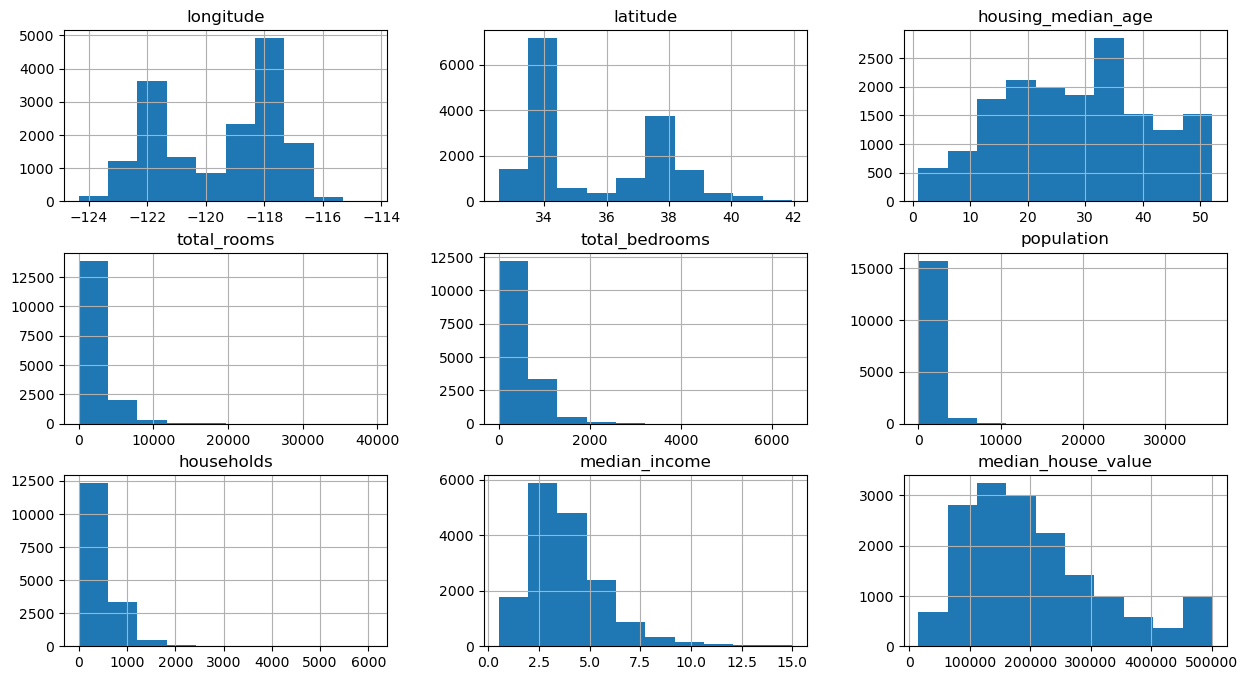

In [9]:
train_data.hist(figsize=(15,8))

heatmap can only get numeric value thats why we remove the string values by  (numeric_only=True)

<Axes: >

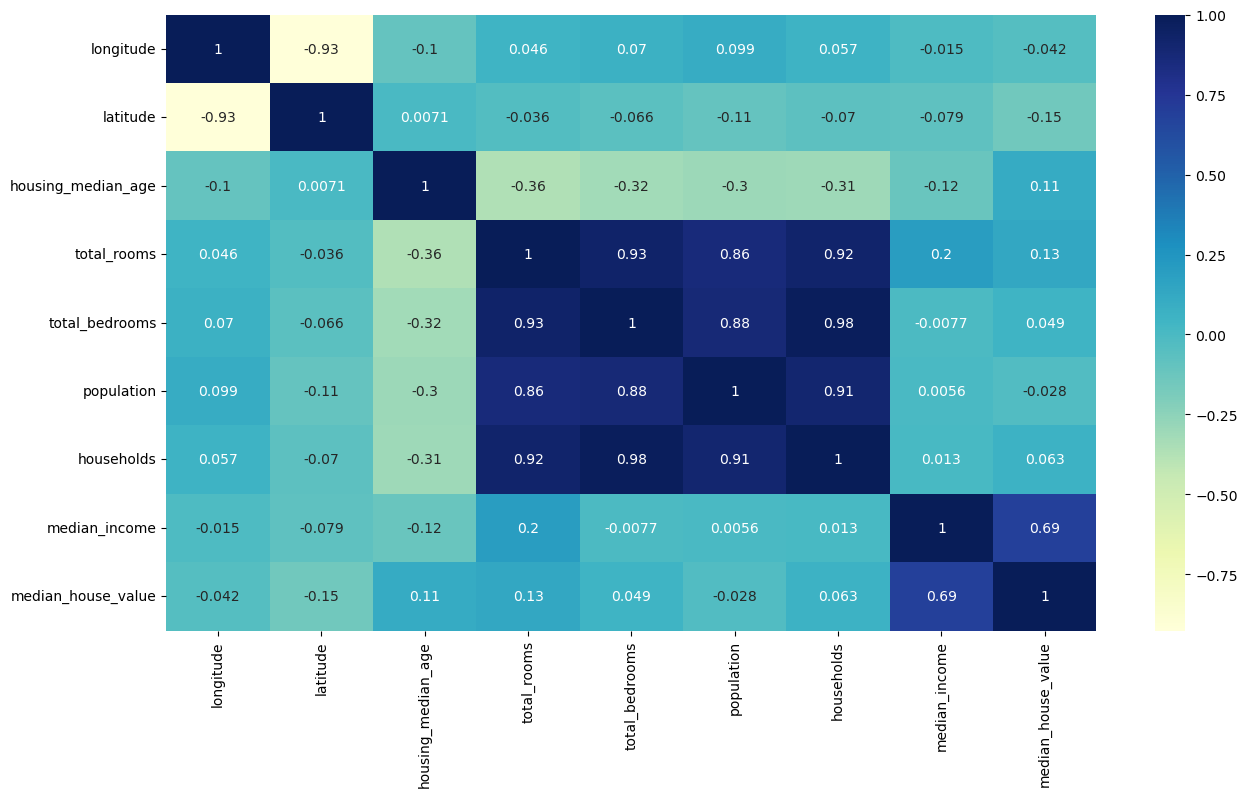

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap='YlGnBu')

we fix the values of our features (there is no -0.532 bedrooms) so we give them + 1

In [11]:
train_data['total_rooms']=np.log(train_data['total_rooms'] +1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms'] +1)
train_data['population']=np.log(train_data['population'] +1)
train_data['households']=np.log(train_data['households'] +1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

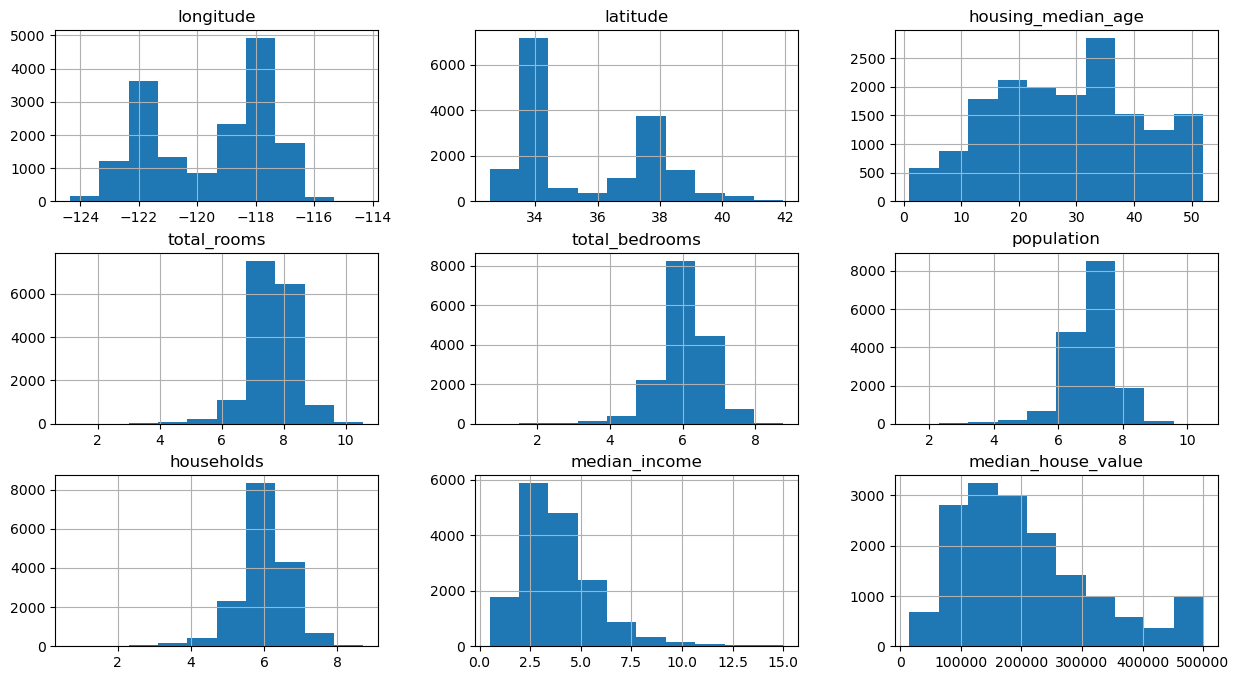

In [12]:
train_data.hist(figsize=(15,8))

we transform the oceans feature that is string to numeric values 

In [13]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7252
INLAND        5183
NEAR OCEAN    2116
NEAR BAY      1792
ISLAND           3
Name: count, dtype: int64

In [14]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)


<Axes: >

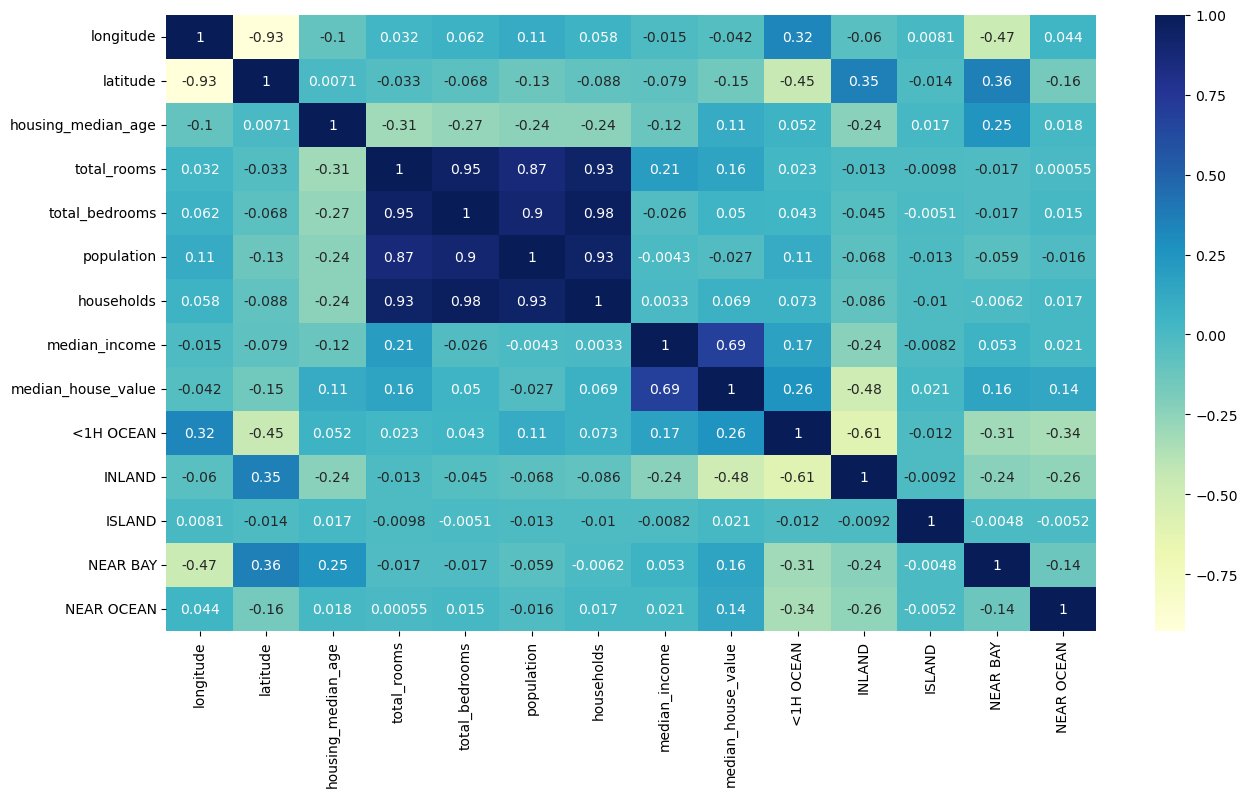

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

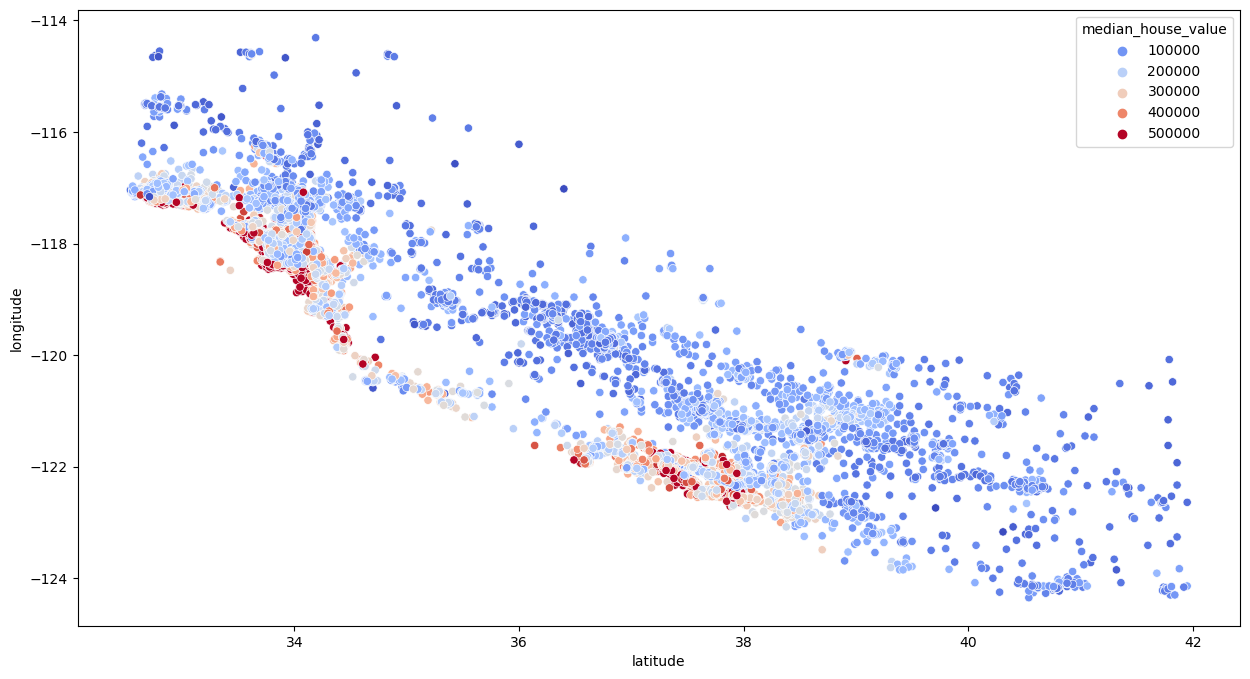

In [16]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',
                data=train_data,
                hue='median_house_value',
                palette='coolwarm')

feature engineering 

In [17]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['househlod_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

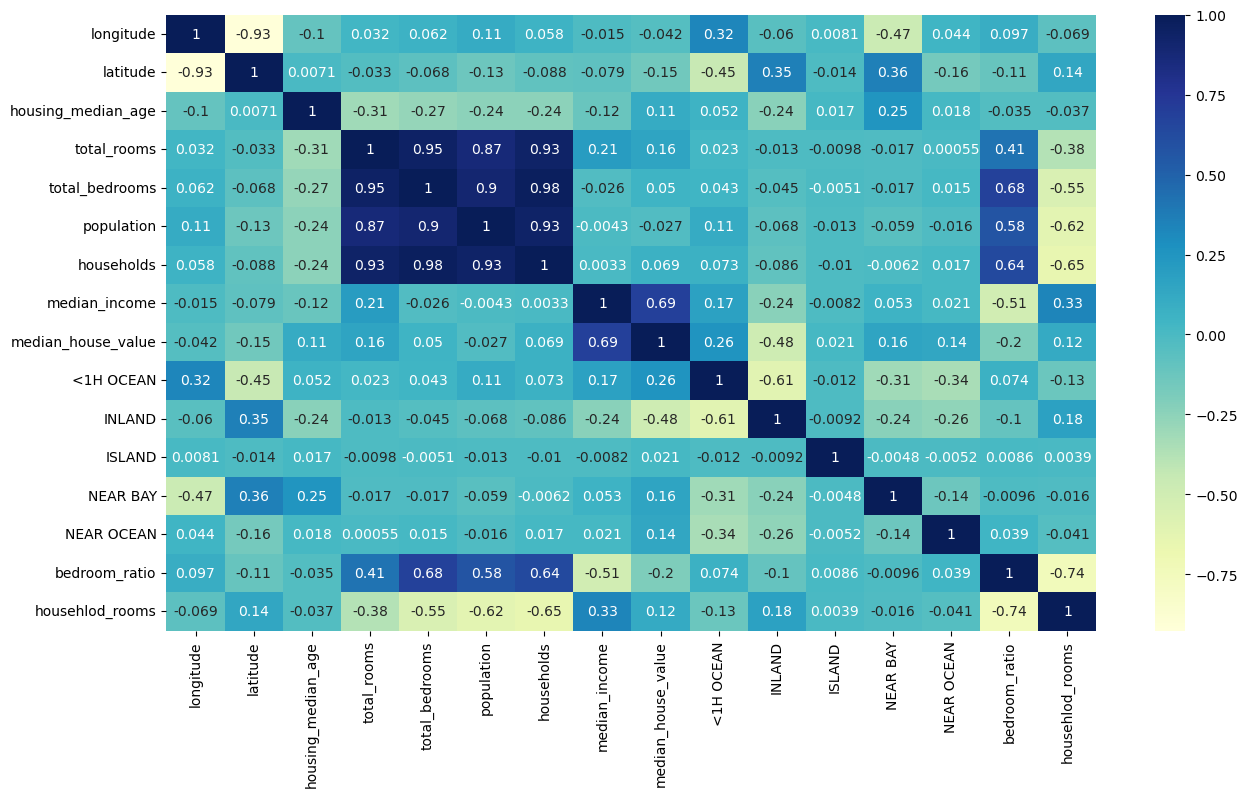

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap='YlGnBu')

simple linear regression model 

In [19]:
from sklearn.linear_model import LinearRegression 
from sklearn. preprocessing import StandardScaler 

scaler = StandardScaler()

x_train,y_train = train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train_s,y_train)

LinearRegression()

In [20]:
test_data = x_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms'] +1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms'] +1)
test_data['population']=np.log(test_data['population'] +1)
test_data['households']=np.log(test_data['households'] +1)


test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['househlod_rooms'] = test_data['total_rooms'] / test_data['households']




In [21]:
x_test,y_test = test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']


In [22]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,househlod_rooms
16775,-122.46,37.68,23.0,7.942007,6.646391,7.592870,6.525030,2.9413,229400.0,False,False,False,False,True,0.836865,1.217160
5717,-118.24,34.20,41.0,7.634337,6.115892,7.156956,6.122493,5.5756,309900.0,True,False,False,False,False,0.801103,1.246933
1010,-121.73,37.68,17.0,9.921082,8.158802,9.078978,8.099858,5.4496,238900.0,False,True,False,False,False,0.822370,1.224846
18547,-122.02,36.97,44.0,6.388561,5.135798,5.786897,4.941642,1.1552,250000.0,False,False,False,False,True,0.803905,1.292801
5073,-118.31,33.98,52.0,7.382746,5.805135,6.803505,5.690359,3.5982,96600.0,True,False,False,False,False,0.786311,1.297413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7247,-118.11,34.00,33.0,7.967973,6.588926,7.882692,6.591674,2.6250,178700.0,True,False,False,False,False,0.826926,1.208794
11328,-117.94,33.76,27.0,7.829233,6.228511,7.529406,6.238325,4.2386,184200.0,True,False,False,False,False,0.795546,1.255022
13090,-121.36,38.55,33.0,7.083388,5.293305,6.318968,5.257495,2.8021,118800.0,False,True,False,False,False,0.747284,1.347293
593,-122.09,37.70,30.0,7.468513,5.598422,6.595781,5.575949,6.0050,263900.0,False,False,False,True,False,0.749603,1.339416


In [23]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,househlod_rooms
2165,-119.83,36.77,32.0,7.961370,6.423247,7.441907,6.347389,2.4286,68100.0,False,True,False,False,False,0.806802,1.254275
10753,-117.89,33.61,44.0,7.662468,6.049733,6.614726,5.808142,5.1923,500001.0,True,False,False,False,False,0.789528,1.319263
13132,-121.48,38.46,8.0,9.259702,7.483244,8.700015,7.435438,4.0516,121200.0,False,True,False,False,False,0.808152,1.245347
11209,-117.90,33.82,32.0,7.080026,5.713733,6.911747,5.620401,2.4931,166900.0,True,False,False,False,False,0.807021,1.259701
10999,-117.79,33.76,25.0,7.619724,5.533389,6.680855,5.521461,11.0546,487200.0,True,False,False,False,False,0.726193,1.380020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6407,-118.02,34.13,34.0,7.584265,5.768321,6.888572,5.697093,7.7307,429000.0,False,True,False,False,False,0.760564,1.331252
13766,-117.08,34.08,34.0,3.828641,2.484907,3.688879,2.708050,3.0625,500001.0,False,True,False,False,False,0.649031,1.413800
13481,-117.37,34.10,10.0,8.133000,6.752270,7.412764,6.516193,1.6977,91300.0,False,True,False,False,False,0.830231,1.248121
15043,-116.92,32.78,21.0,8.341172,6.624065,7.650645,6.566672,4.4306,159100.0,True,False,False,False,False,0.794141,1.270228


In [24]:
x_test_s = scaler.transform(x_test)

In [25]:
reg.score(x_test_s,y_test)

0.6759427605398394

random forest

In [26]:
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor()

forest.fit(x_train,y_train)


RandomForestRegressor()

In [27]:
forest.score(x_test,y_test)

0.8200973199517185

In [30]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()


param_grid = {
    'n_estimators':[100,200,300],
    'min_samples_split':[2,4],
    'max_depth':[None,4,8]
}

grid_search = GridSearchCV(forest,
                           param_grid,
                           cv = 5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True
                          )

grid_search.fit(x_train_s,y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [33]:
best_forest = grid_search.best_estimator_

In [34]:
best_forest.score(x_test_s,y_test)

0.821761953576429